# Import Lib

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [118]:
base_path = "./data/facial-keypoints-detection/"
file_name = "training.csv"
train_df = pd.read_csv(base_path+file_name)

In [119]:
import tensorflow as tf

In [120]:
f = base_path+file_name

In [121]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


# EDA

In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

### 결측치 검토

In [123]:
train_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

## Column별 데이터 분포 및 관계

<AxesSubplot:>

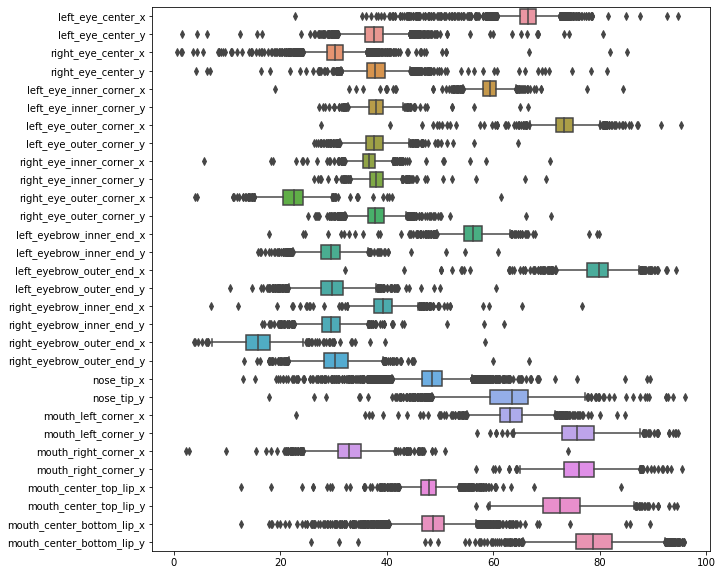

In [124]:
plt.figure(figsize=(10,10))
sns.boxplot(data=train_df,orient="h")

### Keypoints 별 Image Date Value 분포

In [125]:
temp = train_df.iloc[:,-1]
temp = np.array([list(map(int, x.split())) for x in temp]).reshape(-1,96,96)
print(temp.shape)
temp[0]

(7049, 96, 96)


array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [126]:
pixel_pos_names = ["left_eye_center",
                  "right_eye_center",
                  "left_eye_inner",
                  "left_eye_outer",
                 "right_eye_inner",
                 "right_eye_outer",
                 "left_eyebrow_inner",
                 "left_eyebrow_outer",
                   "right_eyebrow_inner",
                   "right_eyebrow_outer",
                 "nose_tip",
                 "mouth_left_conner",
                 "mouth_right_conner",
                 "mouth_center_top_lip",
                 "mouth_center_bottom_lip"]
for r in range(train_df.shape[0]):
    for pos_idx in range(len(pixel_pos_names)):
        x = train_df.iloc[r,2*pos_idx]
        y = train_df.iloc[r,2*pos_idx+1]
        if (x == x) and (y == y):
            train_df.loc[r, pixel_pos_names[pos_idx]] = temp[r,int(x),int(y)]
        else:
            train_df.loc[r, pixel_pos_names[pos_idx]] = -100

train_df.head()


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,right_eye_outer,left_eyebrow_inner,left_eyebrow_outer,right_eyebrow_inner,right_eyebrow_outer,nose_tip,mouth_left_conner,mouth_right_conner,mouth_center_top_lip,mouth_center_bottom_lip
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,145.0,158.0,122.0,116.0,155.0,129.0,145.0,125.0,132.0,132.0
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,41.0,160.0,202.0,139.0,204.0,114.0,107.0,104.0,120.0,24.0
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,152.0,127.0,122.0,129.0,111.0,115.0,134.0,95.0,125.0,167.0
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,167.0,187.0,147.0,100.0,186.0,153.0,158.0,60.0,136.0,193.0
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,154.0,140.0,48.0,62.0,141.0,121.0,146.0,112.0,146.0,59.0


In [127]:
train_df.iloc[:,-15:]

,left_eye_center,right_eye_center,left_eye_inner,left_eye_outer,right_eye_inner,right_eye_outer,left_eyebrow_inner,left_eyebrow_outer,right_eyebrow_inner,right_eyebrow_outer,nose_tip,mouth_left_conner,mouth_right_conner,mouth_center_top_lip,mouth_center_bottom_lip
0,75.0,96.0,29.0,72.0,104.0,145.0,158.0,122.0,116.0,155.0,129.0,145.0,125.0,132.0,132.0
1,195.0,56.0,132.0,203.0,59.0,41.0,160.0,202.0,139.0,204.0,114.0,107.0,104.0,120.0,24.0
2,102.0,87.0,121.0,117.0,119.0,152.0,127.0,122.0,129.0,111.0,115.0,134.0,95.0,125.0,167.0
3,171.0,90.0,149.0,107.0,57.0,167.0,187.0,147.0,100.0,186.0,153.0,158.0,60.0,136.0,193.0
4,81.0,83.0,162.0,55.0,92.0,154.0,140.0,48.0,62.0,141.0,121.0,146.0,112.0,146.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,136.0,179.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,194.0,-100.0,-100.0,-100.0,152.0
7045,63.0,123.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,122.0,-100.0,-100.0,-100.0,117.0
7046,182.0,179.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,186.0,-100.0,-100.0,-100.0,168.0
7047,149.0,124.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,149.0,-100.0,-100.0,-100.0,176.0


In [128]:
train_df.iloc[:,-15:].describe()

,left_eye_center,right_eye_center,left_eye_inner,left_eye_outer,right_eye_inner,right_eye_outer,left_eyebrow_inner,left_eyebrow_outer,right_eyebrow_inner,right_eyebrow_outer,nose_tip,mouth_left_conner,mouth_right_conner,mouth_center_top_lip,mouth_center_bottom_lip
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,131.845226,118.770889,-27.276777,-32.554121,-36.275926,-20.361328,-18.598383,-29.798411,-36.515818,-23.953469,149.880125,-23.356363,-31.171797,-21.439211,142.637254
std,50.648496,51.798298,108.609605,102.109331,95.354756,118.945878,120.774619,107.487297,96.114291,115.159762,48.231116,114.705751,103.642587,117.068356,55.026969
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,97.000000,82.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,116.000000,-100.000000,-100.000000,-100.000000,110.000000
50%,130.000000,116.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,150.000000,-100.000000,-100.000000,-100.000000,145.000000
75%,169.000000,155.000000,92.000000,70.000000,70.000000,108.000000,117.000000,83.000000,59.000000,102.000000,186.000000,104.000000,77.000000,110.000000,181.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,254.000000,255.000000,254.000000,253.000000,254.000000,255.000000


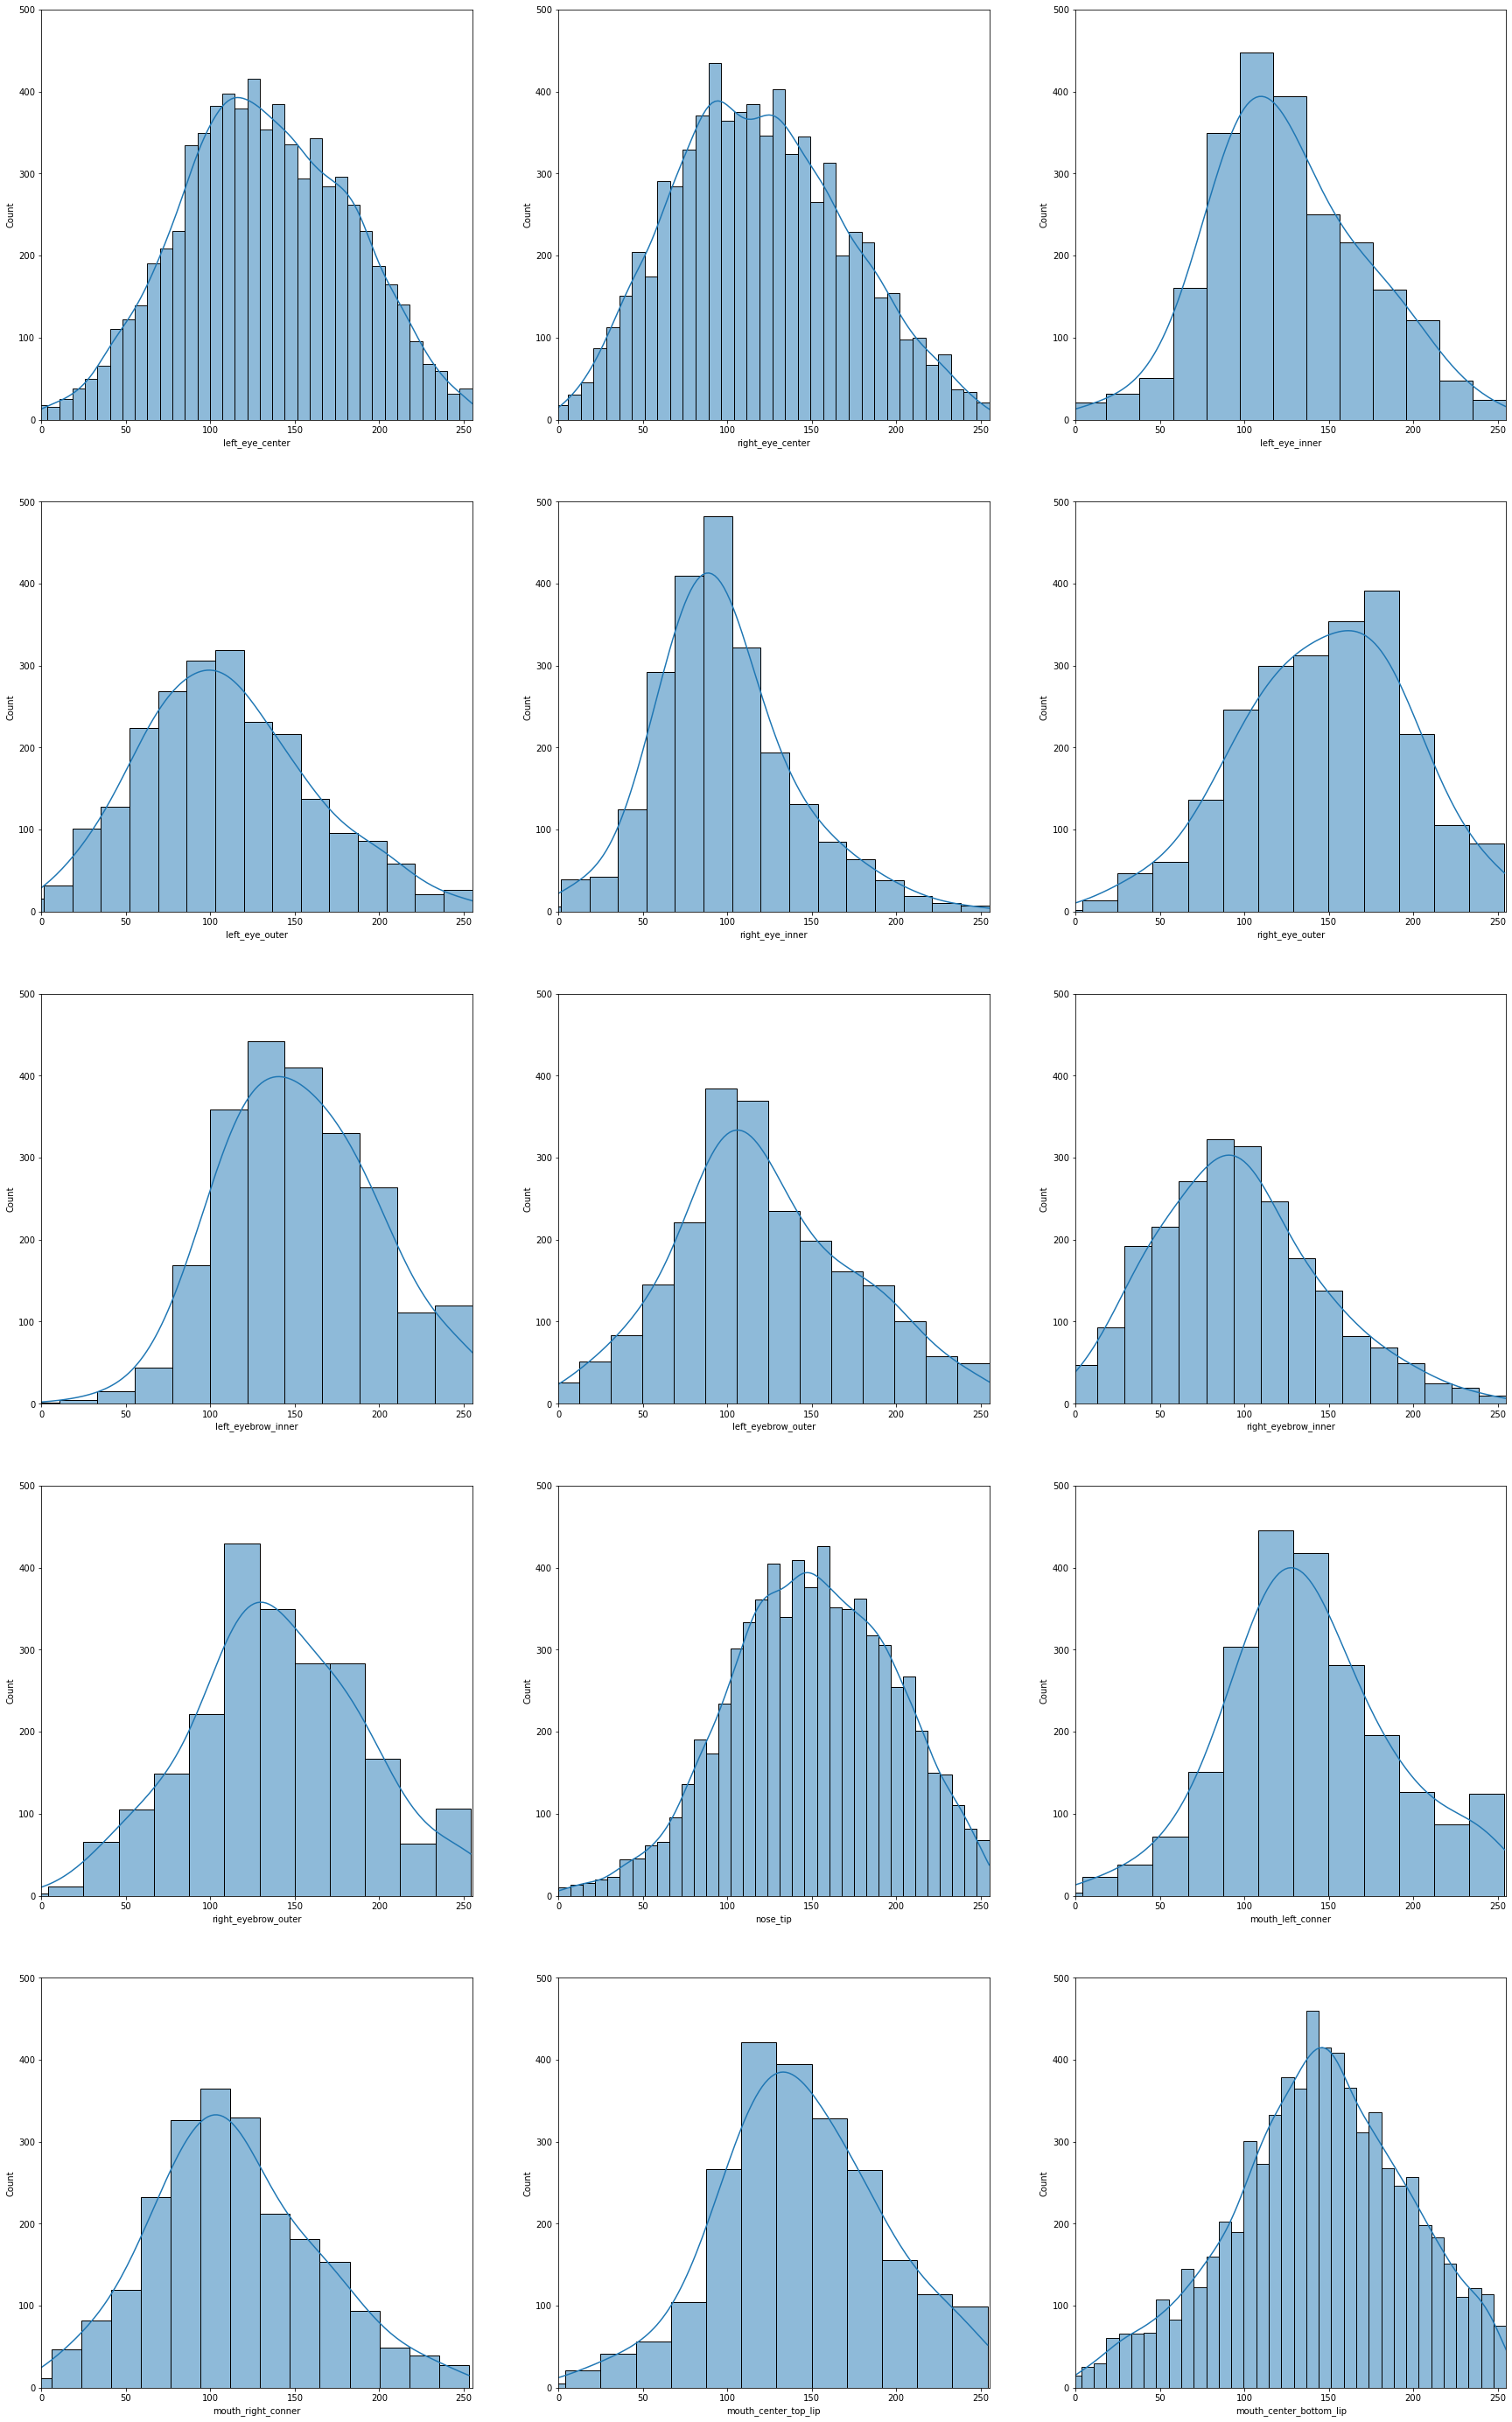

In [129]:
pixel_val_cols = train_df.iloc[:,-15:].columns

plt.figure(figsize=(30,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.histplot(data=train_df,x=pixel_val_cols[i], kde=True)
    plt.xlim(0,255)
    plt.ylim(0,500)


### keypoint 별 (x, y) 위치 분포

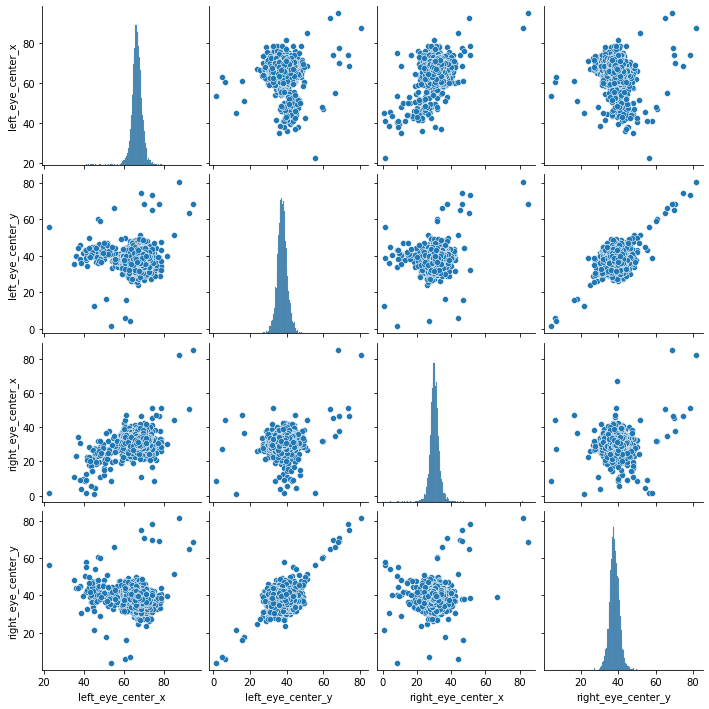

In [130]:
sns.pairplot(data=train_df.iloc[:,0:4])

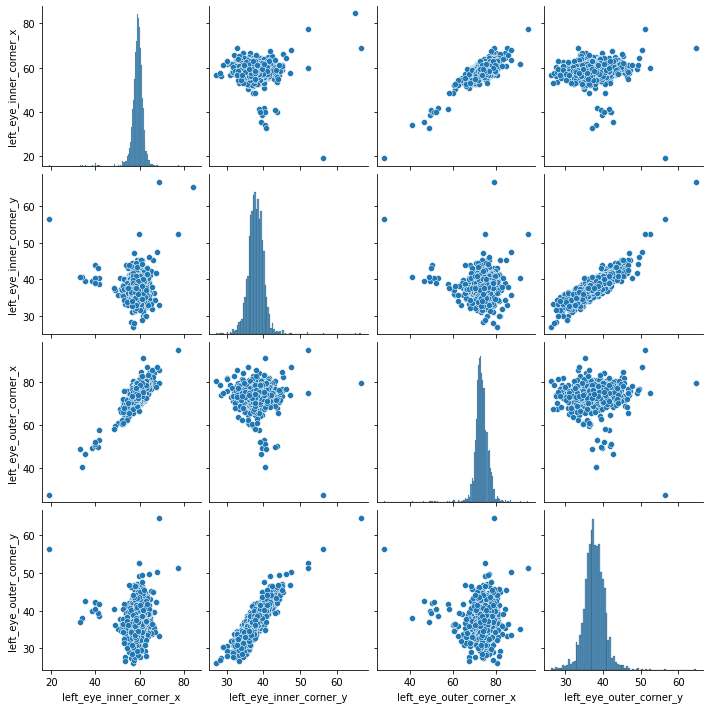

In [131]:
sns.pairplot(data=train_df.iloc[:,4:8])

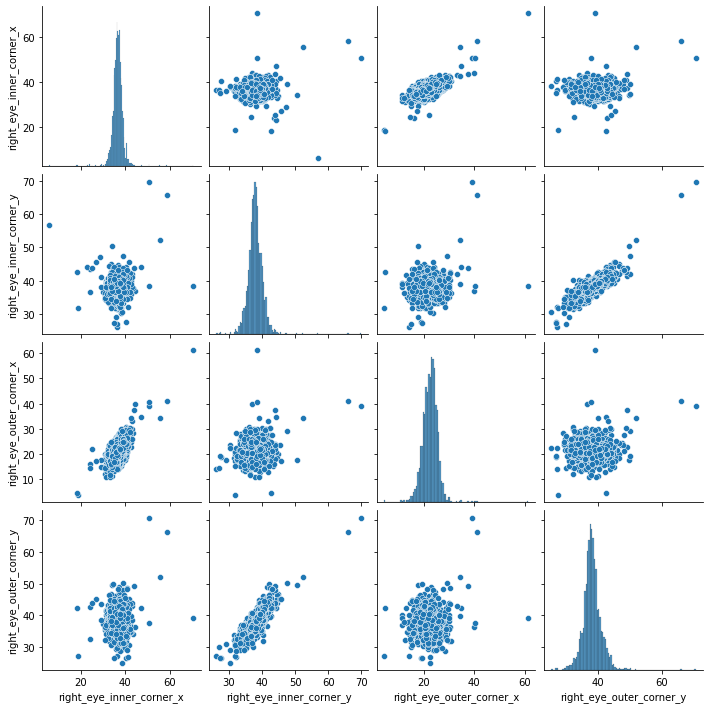

In [132]:
sns.pairplot(data=train_df.iloc[:,8:12])

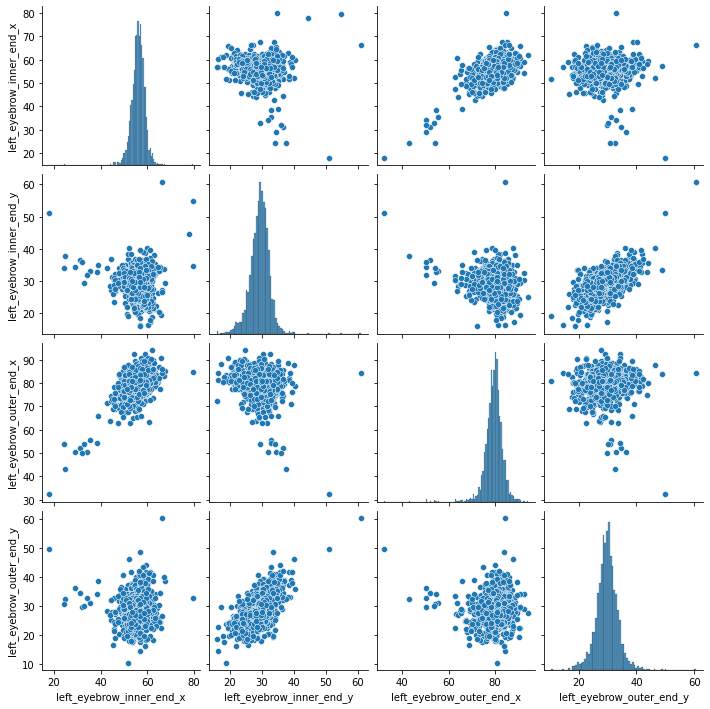

In [133]:
sns.pairplot(data=train_df.iloc[:,12:16])

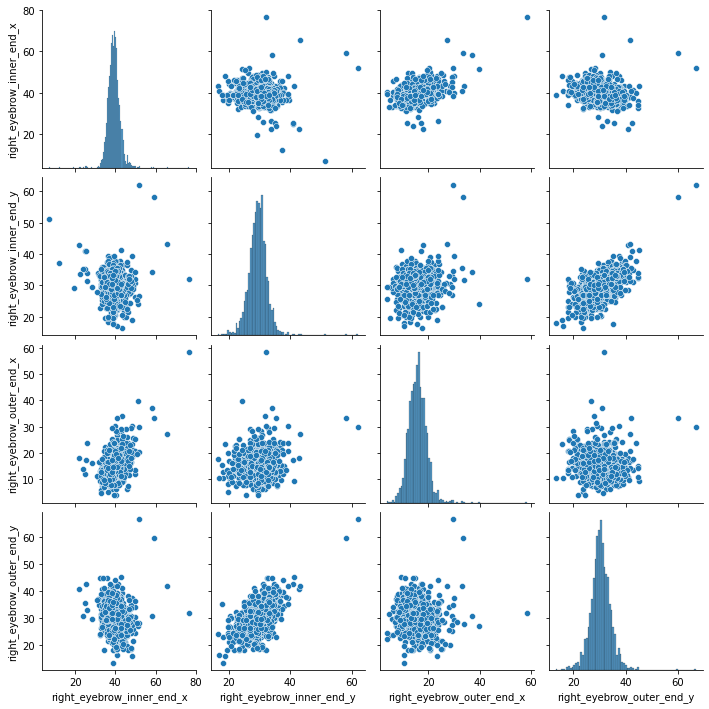

In [134]:
sns.pairplot(data=train_df.iloc[:,16:20])

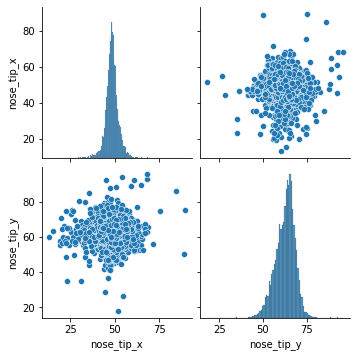

In [135]:
sns.pairplot(data=train_df.iloc[:,20:22])

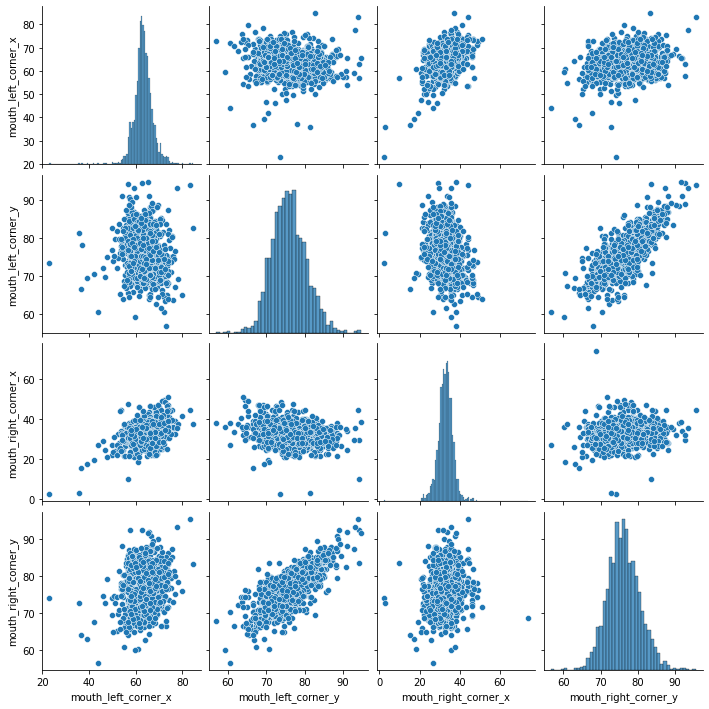

In [136]:
sns.pairplot(data=train_df.iloc[:,22:26])

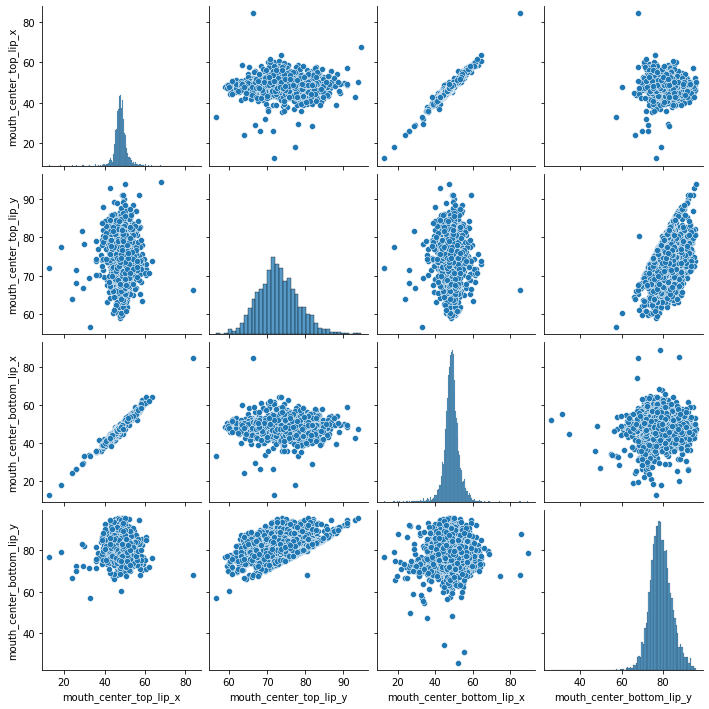

In [137]:
sns.pairplot(data=train_df.iloc[:,26:30])

#### 특이값 데이터 확인

In [138]:
train_df[train_df.left_eye_inner_corner_y > 60]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,right_eye_outer,left_eyebrow_inner,left_eyebrow_outer,right_eyebrow_inner,right_eyebrow_outer,nose_tip,mouth_left_conner,mouth_right_conner,mouth_center_top_lip,mouth_center_bottom_lip
1877,92.622962,63.511878,50.414861,64.779932,84.440991,65.081850,NaN,NaN,58.596832,65.897028,...,145.0,141.0,-100.0,213.0,43.0,46.0,-100.0,-100.0,-100.0,-100.0
1881,74.210171,65.195720,45.424104,69.718677,69.020452,66.562559,79.452855,64.61823,50.781688,69.808803,...,78.0,119.0,108.0,99.0,68.0,19.0,-100.0,-100.0,-100.0,-100.0


59.582075188 39.6474225564


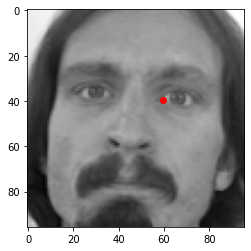

In [157]:
r = 0
plt.figure()
plt.gca().invert_yaxis()
x = train_df.iloc[r,4]
y = train_df.iloc[r,5]
plt.imshow(temp[r], cmap="gray")

plt.plot(x, y, "ro")
print(x, y)

### keypoint 별 (x, y) 위치 분포, wit pixel value

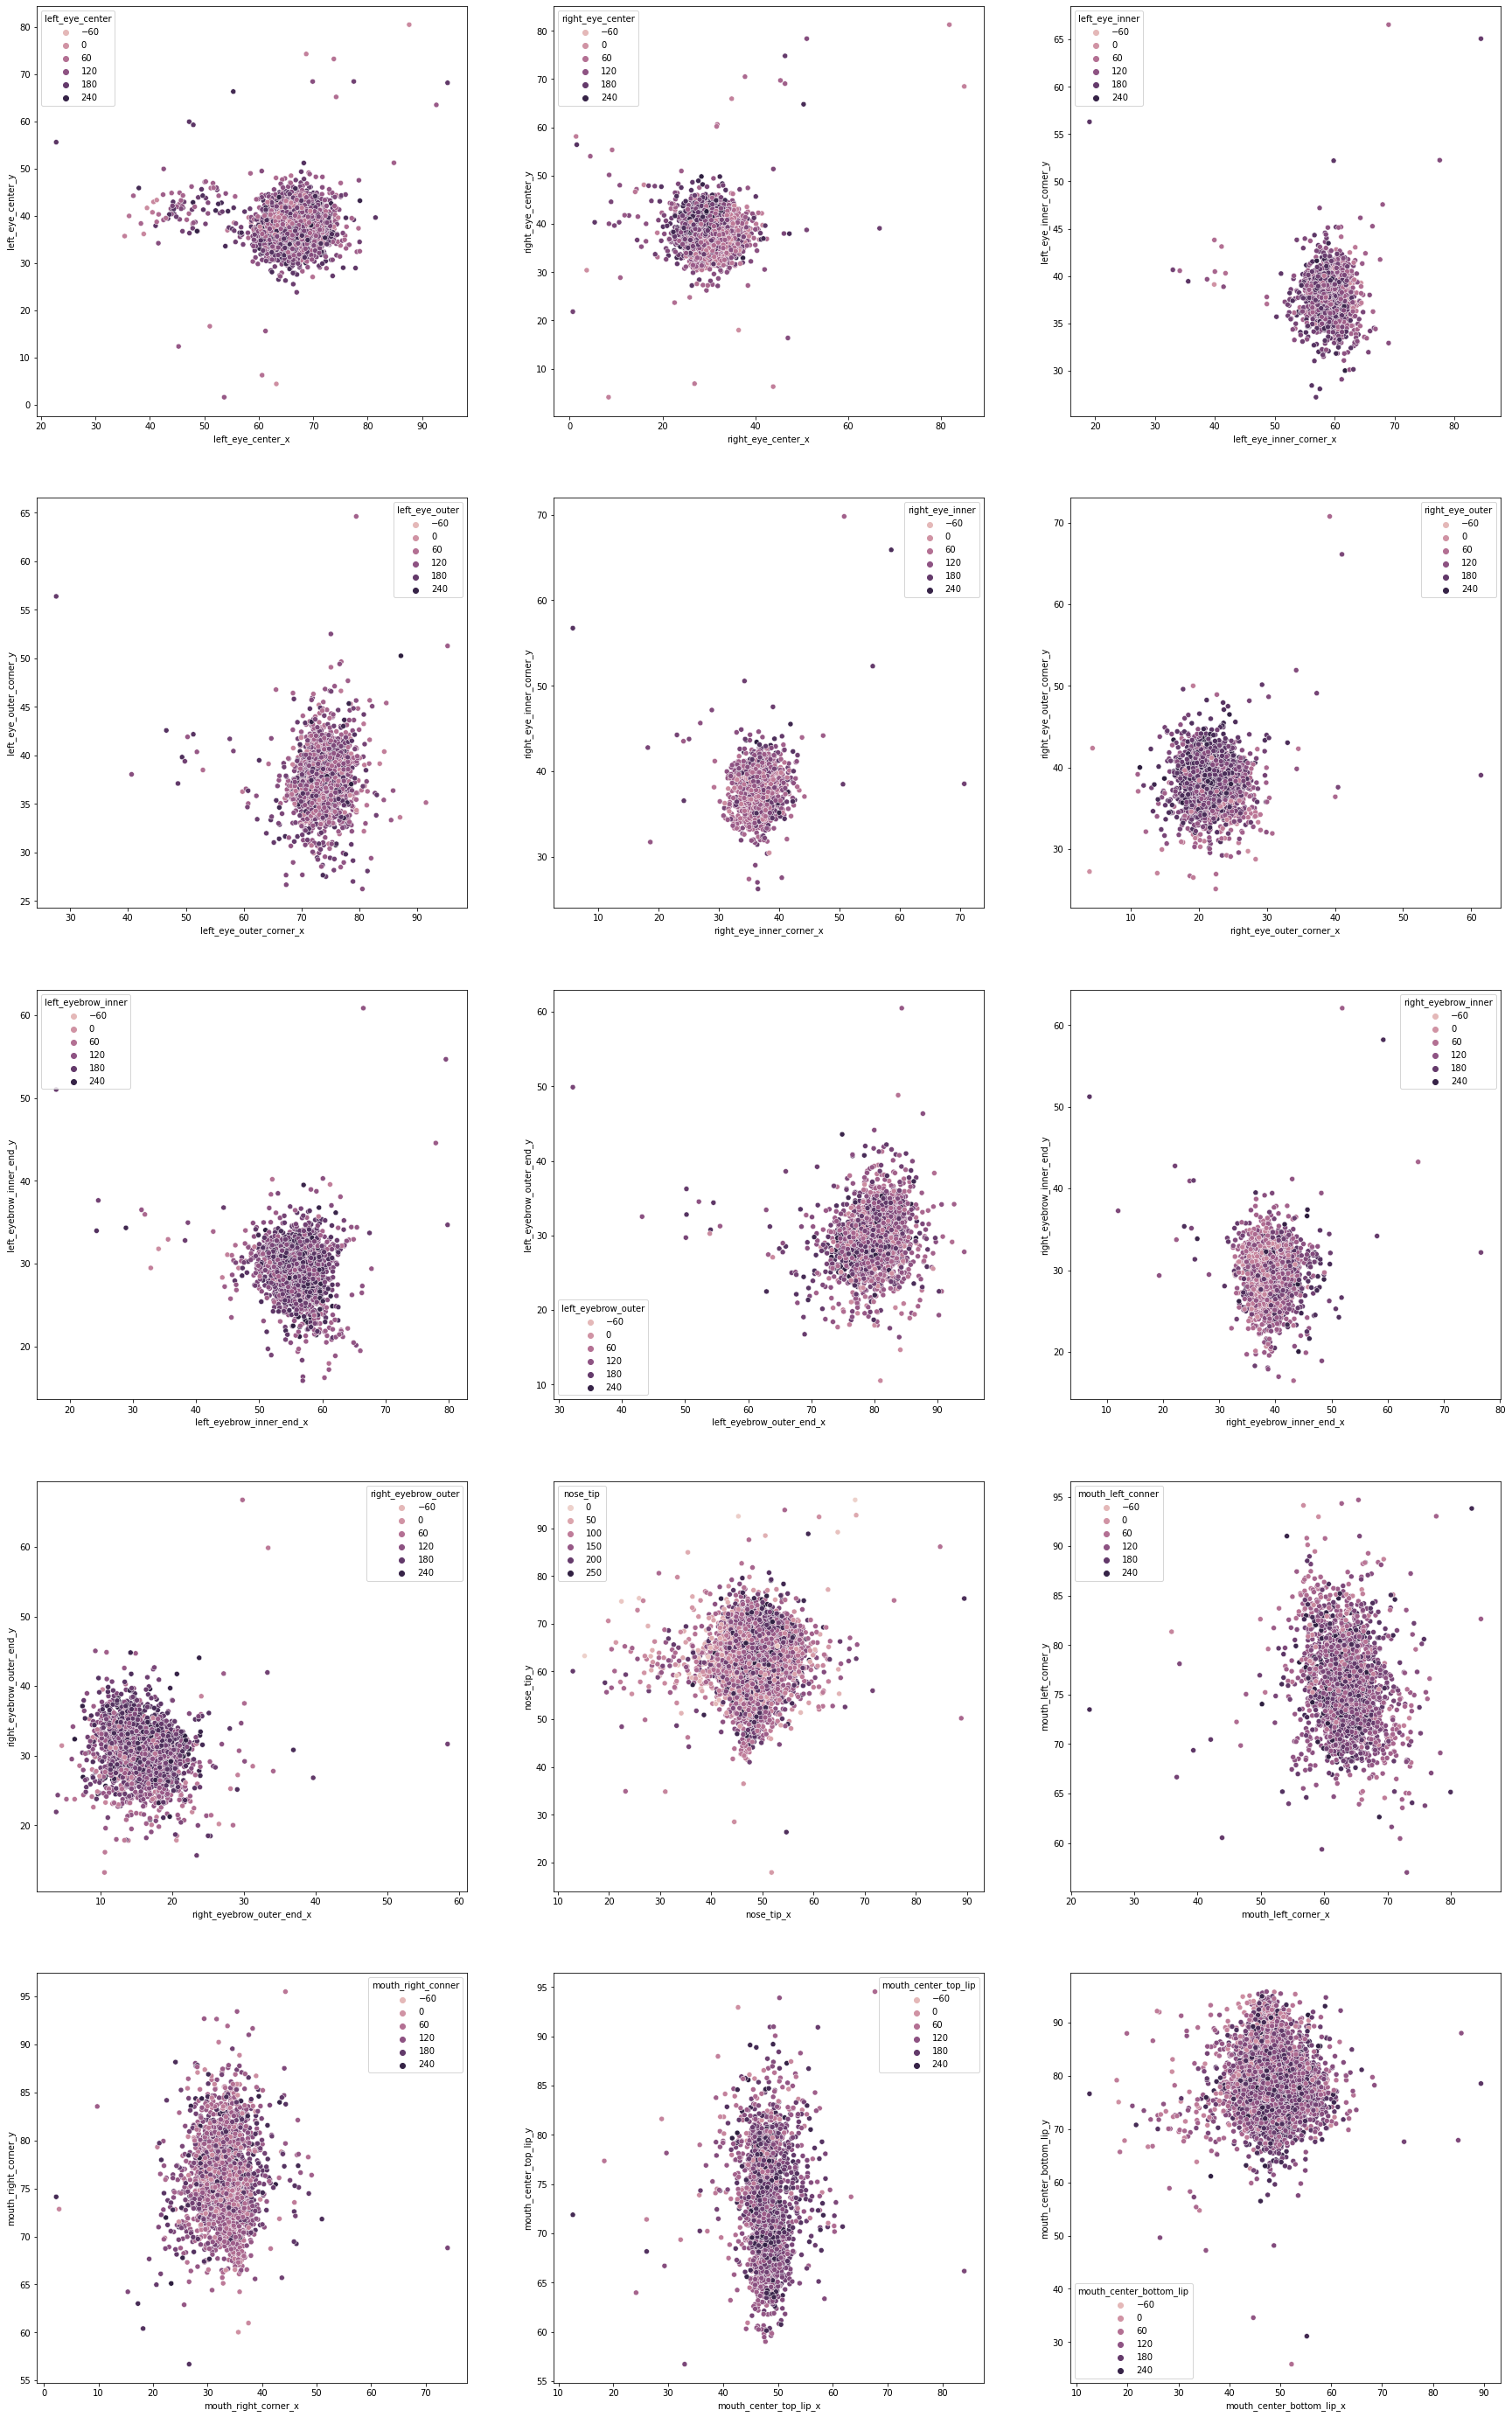

In [140]:
cols = train_df.columns
plt.figure(figsize=(30,50))
for i in range(15):
    plt.subplot(5,3,i+1)
    sns.scatterplot(data=train_df,x=cols[2*i], y=cols[2*i+1], hue=pixel_pos_names[i])


# 전처리
- 결측치 처리 : -100로 대치
- 이미지 데이터 정리 np.array(dtype:int)

In [141]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [145]:
train_df = train_df.fillna(-100)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7049 non-null   float64
 1   left_eye_center_y          7049 non-null   float64
 2   right_eye_center_x         7049 non-null   float64
 3   right_eye_center_y         7049 non-null   float64
 4   left_eye_inner_corner_x    7049 non-null   float64
 5   left_eye_inner_corner_y    7049 non-null   float64
 6   left_eye_outer_corner_x    7049 non-null   float64
 7   left_eye_outer_corner_y    7049 non-null   float64
 8   right_eye_inner_corner_x   7049 non-null   float64
 9   right_eye_inner_corner_y   7049 non-null   float64
 10  right_eye_outer_corner_x   7049 non-null   float64
 11  right_eye_outer_corner_y   7049 non-null   float64
 12  left_eyebrow_inner_end_x   7049 non-null   float64
 13  left_eyebrow_inner_end_y   7049 non-null   float

In [143]:
x = train_df.iloc[0,0]
y = train_df.iloc[0,1]
x, y

(66.0335639098, 39.0022736842)

In [ ]:
# 입력 이미지 데이터 변환(문자열 -> numpy array)
# temp = train_df.iloc[:,-1]
# temp = np.array([list(map(int, x.split())) for x in temp]).reshape(-1,96,96)
# print(temp.shape)
# temp[0]